Gnomes are mining gold periodically reporting their bounty. On this mining operation there were two generation of tools being used, some gnomes were equipped with 1st generation tools, others with 2nd generation. After the introduction of new generation tooling Gnome Inc CEO noticed that performance didn’t match his expectations. You as an analyst of Gnome Inc should confirm or reject CEO worries supporting your findings by cold hard data.

In [439]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

import numpy as np
import pandas as pd
from scipy.stats import norm, mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

from tqdm.auto import tqdm

sns.set(rc={'figure.figsize':(10, 5)})
plt.style.use('ggplot')

In [440]:
df = pd.read_csv('/Users/tsyrdugar/Downloads/gold_mining_data.csv')

In [441]:
df.head()

,dwarf_id,hired_date,reported_date,gold_mined,hammer_date
0,1,2014-01-01,2014-01-31,656,2014-01-01
1,1,2014-01-01,2014-02-28,565,2014-01-01
2,1,2014-01-01,2014-03-31,516,2014-01-01
3,1,2014-01-01,2014-04-30,568,2014-01-01
4,1,2014-01-01,2014-05-31,556,2014-01-01


In [442]:
# Уникальные значения в hammer_date, то есть инструменты 1 поколения и 2 поколения 
df['hammer_date'].unique()

array(['2014-01-01', '2015-01-01'], dtype=object)

In [443]:
df.dtypes

dwarf_id          int64
hired_date       object
reported_date    object
gold_mined        int64
hammer_date      object
dtype: object

In [444]:
df['hired_date'] = pd.to_datetime(df['hired_date'])
df['reported_date'] = pd.to_datetime(df['reported_date'])

In [445]:
df.isna().sum()

dwarf_id         0
hired_date       0
reported_date    0
gold_mined       0
hammer_date      0
dtype: int64

In [446]:
df.shape

(13493, 5)

In [447]:
# Суммарное к-во добытого золота по гномам
df.groupby('dwarf_id', as_index=False) \
    .agg({'gold_mined':'sum'}) \
    .sort_values(by='gold_mined', ascending=False) 

,dwarf_id,gold_mined
13,14,10291
10,11,10261
5,6,10236
11,12,10194
14,15,10139
...,...,...
2398,2399,570
2660,2661,566
2279,2280,553
2664,2665,545


In [448]:
# гномы, использующие инструмент 1 поколения
# гномы, использующие инструмент 2 поколения
first = df[df['hammer_date']=='2014-01-01']
second = df[df['hammer_date']=='2015-01-01']

In [449]:
first.shape

(6777, 5)

In [450]:
second.shape

(6716, 5)

In [451]:
first.head()

,dwarf_id,hired_date,reported_date,gold_mined,hammer_date
0,1,2014-01-01,2014-01-31,656,2014-01-01
1,1,2014-01-01,2014-02-28,565,2014-01-01
2,1,2014-01-01,2014-03-31,516,2014-01-01
3,1,2014-01-01,2014-04-30,568,2014-01-01
4,1,2014-01-01,2014-05-31,556,2014-01-01


In [452]:
# к-во золота, добытое каждым гномом из 1
first.groupby('dwarf_id', as_index=False) \
    .agg({'gold_mined':'sum'})

,dwarf_id,gold_mined
0,1,10072
1,2,10065
2,3,9898
3,4,10050
4,5,10136
...,...,...
526,527,4972
527,528,4764
528,529,5066
529,530,4970


In [453]:
# к-во золота, добытое каждым гномом из 2 группы
second.groupby('dwarf_id', as_index=False) \
    .agg({'gold_mined':'sum'})

,dwarf_id,gold_mined
0,532,4714
1,533,4526
2,534,4598
3,535,4704
4,536,4528
...,...,...
2141,2673,695
2142,2674,573
2143,2675,617
2144,2676,609


In [454]:
# суммарное к-во золота из 1 поколения
first['gold_mined'].sum()

3640010

In [455]:
# суммарное к-во золота из 1 поколения
second['gold_mined'].sum()

4094482

In [456]:
df['hired_date'].min()

Timestamp('2014-01-01 00:00:00')

In [457]:
df['hired_date'].max()

Timestamp('2015-08-01 00:00:00')

In [458]:
df['reported_date'].min()

Timestamp('2014-01-31 00:00:00')

In [459]:
# последние данные о добытом золоте приходится на 31 августа 2015 года 
df['reported_date'].max()

Timestamp('2015-08-31 00:00:00')

In [460]:
# количество уникальных гномов
df['dwarf_id'].nunique()

2677

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


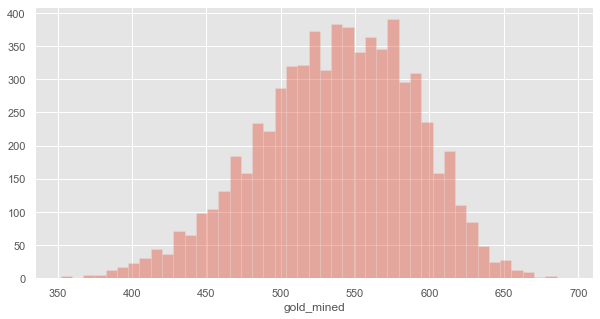

In [461]:
# Распредление к-ва золота в 1 группе гномов
sns.distplot(first['gold_mined'], kde=False);

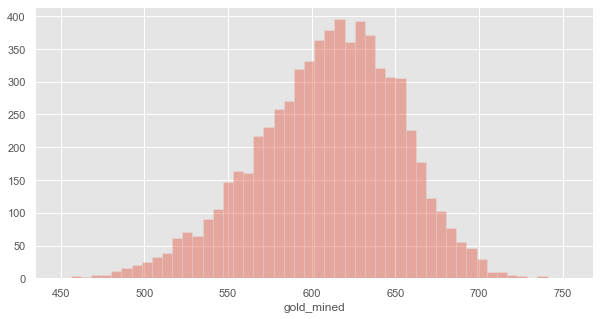

In [462]:
# Распредление к-ва золота во 2 группе гномов
sns.distplot(second['gold_mined'], kde=False);

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gold_mined'>

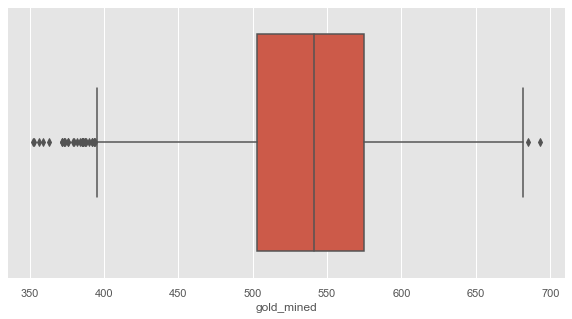

In [463]:
sns.boxplot(first['gold_mined'])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gold_mined'>

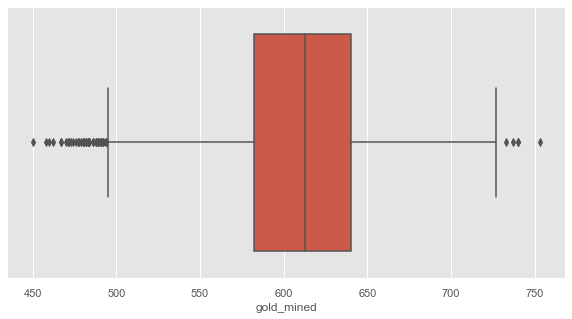

In [464]:
sns.boxplot(second['gold_mined'])

In [465]:
# Описательные статистики для df
df.describe()

,dwarf_id,gold_mined
count,13493.000000,13493.000000
mean,724.746387,573.222560
std,645.211463,60.166139
min,1.000000,352.000000
25%,209.000000,533.000000
50%,528.000000,579.000000
75%,1060.000000,618.000000
max,2677.000000,753.000000


In [466]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13493 entries, 0 to 13492
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   dwarf_id       13493 non-null  int64         
 1   hired_date     13493 non-null  datetime64[ns]
 2   reported_date  13493 non-null  datetime64[ns]
 3   gold_mined     13493 non-null  int64         
 4   hammer_date    13493 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 527.2+ KB


In [467]:
first.head()

,dwarf_id,hired_date,reported_date,gold_mined,hammer_date
0,1,2014-01-01,2014-01-31,656,2014-01-01
1,1,2014-01-01,2014-02-28,565,2014-01-01
2,1,2014-01-01,2014-03-31,516,2014-01-01
3,1,2014-01-01,2014-04-30,568,2014-01-01
4,1,2014-01-01,2014-05-31,556,2014-01-01


In [468]:
# к-во уникальных гномов, работающие с инструментом 1 поколения
first['dwarf_id'].nunique()

531

In [469]:
# к-во уникальных гномов, работающие с инструментом 2 поколения
second['dwarf_id'].nunique()

2146

In [470]:
first['hired_date'].max()

Timestamp('2014-12-01 00:00:00')

In [471]:
second['hired_date'].min()

Timestamp('2015-01-01 00:00:00')

In [472]:
# Среднее значение добытого золота с 1 поколением инструмента
first['gold_mined'].mean()

537.112291574443

In [473]:
# Среднее значение добытого золота с 2 поколением инструмента
second['gold_mined'].mean()

609.6608100059559

In [474]:
# Медианное значение добытого золота с 1 поколением инструмента
first['gold_mined'].median()

541.0

In [475]:
# Медианное значение добытого золота с 1 поколением инструмента
second['gold_mined'].median()

613.0

In [476]:
# гном с id 531 был последним, кто использовал инструмент 1 поколения
first.groupby('dwarf_id', as_index=False) \
    .agg({'gold_mined': 'sum'}) \
    .sort_values(by='dwarf_id', ascending=True)

,dwarf_id,gold_mined
0,1,10072
1,2,10065
2,3,9898
3,4,10050
4,5,10136
...,...,...
526,527,4972
527,528,4764
528,529,5066
529,530,4970


In [477]:
# гном с id 532 был первым, кто использовал инструмент 2 поколения
second.groupby('dwarf_id', as_index=False) \
    .agg({'gold_mined': 'sum'}) \
    .sort_values(by='dwarf_id', ascending=True)

,dwarf_id,gold_mined
0,532,4714
1,533,4526
2,534,4598
3,535,4704
4,536,4528
...,...,...
2141,2673,695
2142,2674,573
2143,2675,617
2144,2676,609


In [478]:
# К-во работ, которые выполнил каждый гном в 1 группе
first['dwarf_id'].value_counts()

4      20
1      20
15     20
11     20
7      20
       ..
492     9
496     9
500     9
504     9
531     9
Name: dwarf_id, Length: 531, dtype: int64

In [479]:
# К-во работ, которые выполнил каждый гном во 2 группе
second['dwarf_id'].value_counts()

565     8
535     8
543     8
547     8
551     8
       ..
2362    1
2366    1
2370    1
2374    1
2458    1
Name: dwarf_id, Length: 2146, dtype: int64

In [480]:
# Среднее к-во работ, которое было выполнено в 1 группе, т.е в среднем один гном выполнил 12.8 работ, используя 1 поколение инструм.
# При условии, что их выполняло всего 531 гном. 
first['dwarf_id'].value_counts().mean()

12.76271186440678

In [481]:
# Среднее к-во работ, которое было выполнено в 2 группе, т.е в среднем один гном выполнил 3.1 работ, используя 2 поколение инструм.
# При условии, что их выполняло всего 2146 гномов.
second['dwarf_id'].value_counts().mean()

3.1295433364398884

In [482]:
# создаем колонки с месяцем и годом добычи золота
df['reported_month'] = df['reported_date'].dt.month
df['reported_year'] = df['reported_date'].dt.year

In [483]:
df.head()

,dwarf_id,hired_date,reported_date,gold_mined,hammer_date,reported_month,reported_year
0,1,2014-01-01,2014-01-31,656,2014-01-01,1,2014
1,1,2014-01-01,2014-02-28,565,2014-01-01,2,2014
2,1,2014-01-01,2014-03-31,516,2014-01-01,3,2014
3,1,2014-01-01,2014-04-30,568,2014-01-01,4,2014
4,1,2014-01-01,2014-05-31,556,2014-01-01,5,2014


In [484]:
# К-во золота, добытое по месяцам в 2014 году с использованием 1 инструмента 
df.query('reported_year == 2014 and hammer_date == "2014-01-01"') \
    .groupby('reported_month', as_index=False) \
    .agg({'gold_mined':'sum'})

,reported_month,gold_mined
0,1,10325
1,2,22111
2,3,31009
3,4,43172
4,5,68970
5,6,94225
6,7,113210
7,8,134583
8,9,153241
9,10,217284


In [485]:
# К-во золота, добытое по месяцам в 2015 году с использованием 1 инструмента 
df.query('reported_year == 2015 and hammer_date == "2014-01-01"') \
    .groupby('reported_month', as_index=False) \
    .agg({'gold_mined':'sum'})

,reported_month,gold_mined
0,1,293876
1,2,288118
2,3,282294
3,4,277161
4,5,271531
5,6,267380
6,7,261187
7,8,256345


In [486]:
# К-во золота, добытое по месяцам в 2014 году с использованием 2 инструмента
df.query('reported_year == 2014 and hammer_date == "2015-01-01"') \
    .groupby('reported_month', as_index=False) \
    .agg({'gold_mined':'sum'})

,reported_month,gold_mined


In [487]:
# К-во золота, добытое по месяцам в 2015 году с использованием 2 инструмента
df.query('reported_year == 2015 and hammer_date == "2015-01-01"') \
    .groupby('reported_month', as_index=False) \
    .agg({'gold_mined':'sum'})

,reported_month,gold_mined
0,1,51451
1,2,172187
2,3,235877
3,4,307665
4,5,429479
5,6,580702
6,7,1021082
7,8,1296039


In [488]:
# К-во выполненных работ в январе 2014 года с использованием 1 инструмента
df.query('reported_month == 1 and reported_year == 2014 and hammer_date == "2014-01-01"') \
    .value_counts().sum()

17

In [489]:
# К-во выполненных работ в январе 2014 года с использованием 2 инструмента
df.query('reported_month == 1 and reported_year == 2014 and hammer_date == "2015-01-01"') \
    .value_counts().sum()

0

In [490]:
# К-во выполненных работ в январе 2015 года, принесшие с использованием 1 инструмента
df.query('reported_month == 1 and reported_year == 2015 and hammer_date == "2014-01-01"') \
    .value_counts().sum()

531

In [491]:
# К-во выполненных работ в январе 2015 года, принесшие с использованием 2 инструмента
df.query('reported_month == 1 and reported_year == 2015 and hammer_date == "2015-01-01"') \
    .value_counts().sum()

80

In [492]:
# К-во добытого золота в 2015 году (за 8 месяцев) с использованием 1 инструмента 
df.query('reported_year == 2015 and hammer_date == "2014-01-01"') \
    ['gold_mined'].sum()

2197892

In [493]:
# К-во добытого золота в 2015 году (за 8 месяцев) с использованием 2 инструмента 
df.query('reported_year == 2015 and hammer_date == "2015-01-01"') \
    ['gold_mined'].sum()

4094482

1) Считаем средний к-во золота на гнома за 1 день. 

2) Проверяем статистически значимое различие в средних.

3) Исключим все отчеты, которые приходили позже 2014-08-31 для группы А, чтобы снизить риск возникновения сезонного фактора.

In [494]:
# Находим время от начала работы до отчета
df['distance'] = (df['reported_date'] - df['hired_date']).apply(lambda x: x.days)

In [495]:
df.head()

,dwarf_id,hired_date,reported_date,gold_mined,hammer_date,reported_month,reported_year,distance
0,1,2014-01-01,2014-01-31,656,2014-01-01,1,2014,30
1,1,2014-01-01,2014-02-28,565,2014-01-01,2,2014,58
2,1,2014-01-01,2014-03-31,516,2014-01-01,3,2014,89
3,1,2014-01-01,2014-04-30,568,2014-01-01,4,2014,119
4,1,2014-01-01,2014-05-31,556,2014-01-01,5,2014,150


In [496]:
#Посмотрим, как меняется доход на пользователя со временем его работы
df_distance_2014 = df.query('hammer_date == "2014-01-01" and reported_date <"2014-08-31"')\
    .groupby('distance', as_index=False)\
    .agg({'gold_mined':'mean'})

In [497]:
df_distance_2014.head()

,distance,gold_mined
0,27,605.700000
1,29,599.000000
2,30,597.937500
3,58,587.405405
4,60,584.492063


<AxesSubplot:xlabel='distance', ylabel='gold_mined'>

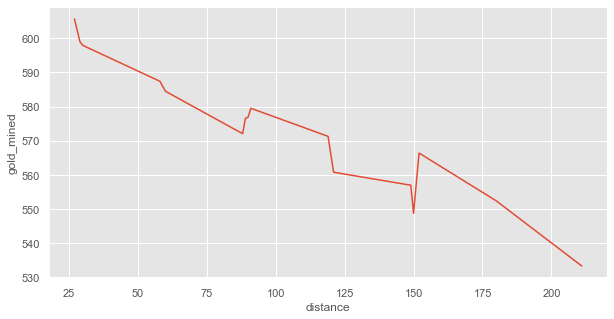

In [498]:
sns.lineplot(data=df_distance_2014, x='distance', y='gold_mined')

In [499]:
df_distance_2015 = df.query('hammer_date == "2015-01-01" and reported_date >"2015-01-01"')\
    .groupby('distance', as_index=False)\
    .agg({'gold_mined':'mean'})
df_distance_2015.head()

,distance,gold_mined
0,27,640.602094
1,29,637.784211
2,30,638.083175
3,58,623.726937
4,60,622.505080


In [500]:
df_distance_2015.head()

,distance,gold_mined
0,27,640.602094
1,29,637.784211
2,30,638.083175
3,58,623.726937
4,60,622.505080


<AxesSubplot:xlabel='distance', ylabel='gold_mined'>

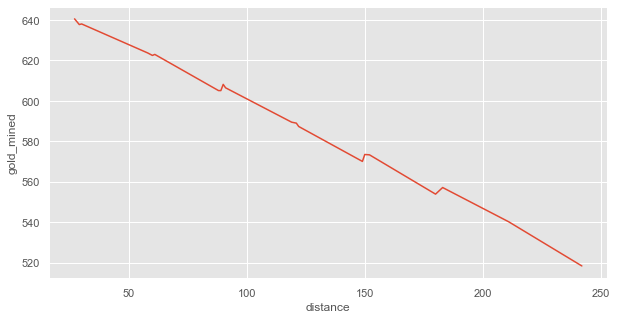

In [501]:
sns.lineplot(data=df_distance_2015, x='distance', y='gold_mined')

In [502]:
df_2014_agg = df.query('hammer_date == "2014-01-01" and reported_date < "2014-08-31"')\
    .groupby('dwarf_id', as_index=False)\
    .agg({'gold_mined':'sum', 'distance':'max'})

df_2014_agg['mean_gold_in_day'] = df_2014_agg['gold_mined'] / df_2014_agg['distance']

In [503]:
df_2015_agg = df.query('hammer_date == "2015-01-01" and reported_date > "2015-01-01"')\
    .groupby('dwarf_id', as_index=False)\
    .agg({'gold_mined':'sum', 'distance':'max'})

df_2015_agg['mean_gold_in_day'] = df_2015_agg['gold_mined'] / df_2015_agg['distance']

In [504]:
df_2014_agg.mean_gold_in_day.mean()

19.43211454421569

In [505]:
df_2015_agg.mean_gold_in_day.mean()

20.482883950543048

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mean_gold_in_day', ylabel='Density'>

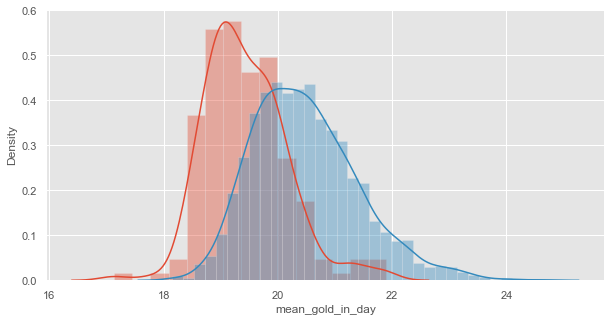

In [506]:
sns.distplot(df_2014_agg.mean_gold_in_day)
sns.distplot(df_2015_agg.mean_gold_in_day)

Сформулируем гипотезы:
    
H0 - между средними двух совокупностей разницы нет.

H1 - между средними двух совокупностей есть разница.

In [507]:
# Объявим функцию, которая позволит проверять гипотезы с помощью бутстрапа
def get_bootstrap(
    group_control, # числовые значения первой выборки
    group_test, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_len = max([len(group_control), len(group_test)])
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = group_control.sample(
            boot_len, 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = group_test.sample(
            boot_len, 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) # mean() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    ci = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    plt.hist(pd_boot_data[0], bins = 50)
    
    plt.style.use('ggplot')
    plt.vlines(ci,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return { 
            "ci": ci, 
            "p_value": p_value}

  0%|          | 0/2000 [00:00<?, ?it/s]

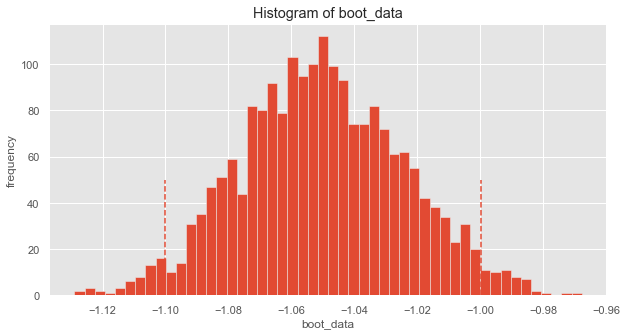

{'ci':               0
 0.025 -1.100306
 0.975 -0.999794,
 'p_value': 0.0}

In [508]:
get_bootstrap(df_2014_agg.mean_gold_in_day, df_2015_agg.mean_gold_in_day , boot_it = 2000)

Отвергаем нулевую гипотезу о равестве средних и принимаем альтернативную гипотезу о том, что в группе Б (инструмент 2 поколения/гномы "2015 года") средний сбор золота в день выше.

Выводы:

1) Необходимо учесть, что золото добывалось в разное время, и так А/Б тест проводить крайне не рекомендуется!
Может быть, гномы нашли новый рудникик, и результат зависел не от изменений технологий, а от других факторов. Или, например, в одном из годов была эпидемия, и гномы могли чувствовать себя хуже на фоне болезни.

2) Корректный А/Б тест мы бы на одном руднике не смогли провести, поскольку есть риск сетевого эффекта, и могла измениться мотивация для работы одной из групп, и когортный анализ здесь меньшее зло.

По итогу - оставляем второе поколение инструментов.Опасения директора не имели под собой основания для беспокойства. 